In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 20)
from IPython.display import display, HTML;  display(HTML('<style>.container { width:90% !important; }</style>'))

In [2]:
df = pd.read_csv("fw20_d.csv")
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,LOP
0,1998-01-20,1440,1440,1440,1440,4,12.0
1,1998-01-22,1370,1370,1370,1370,9,21.0
2,1998-01-23,1370,1370,1370,1370,2,22.0
3,1998-01-28,1382,1390,1382,1389,8,9.0
4,1998-01-29,1417,1417,1412,1412,4,21.0
...,...,...,...,...,...,...,...
6451,2023-10-27,2149,2151,2114,2118,33195,62420.0
6452,2023-10-30,2124,2154,2124,2141,34097,62234.0
6453,2023-10-31,2147,2184,2135,2170,32875,63791.0
6454,2023-11-02,2195,2203,2153,2172,40112,65803.0


In [3]:
df = df[:-1]
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,LOP
0,1998-01-20,1440,1440,1440,1440,4,12.0
1,1998-01-22,1370,1370,1370,1370,9,21.0
2,1998-01-23,1370,1370,1370,1370,2,22.0
3,1998-01-28,1382,1390,1382,1389,8,9.0
4,1998-01-29,1417,1417,1412,1412,4,21.0
...,...,...,...,...,...,...,...
6450,2023-10-26,2090,2141,2076,2141,46725,62151.0
6451,2023-10-27,2149,2151,2114,2118,33195,62420.0
6452,2023-10-30,2124,2154,2124,2141,34097,62234.0
6453,2023-10-31,2147,2184,2135,2170,32875,63791.0


In [4]:
df = df[-600:]
df.reset_index(inplace=True)

In [5]:
df

,index,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,LOP
0,5855,2021-06-17,2216,2220,2204,2212,26122,48827.0
1,5856,2021-06-18,2184,2192,2173,2187,29194,42280.0
2,5857,2021-06-21,2169,2194,2158,2192,18119,32962.0
3,5858,2021-06-22,2193,2206,2174,2192,15236,33473.0
4,5859,2021-06-23,2201,2210,2186,2201,13049,33921.0
...,...,...,...,...,...,...,...,...
595,6450,2023-10-26,2090,2141,2076,2141,46725,62151.0
596,6451,2023-10-27,2149,2151,2114,2118,33195,62420.0
597,6452,2023-10-30,2124,2154,2124,2141,34097,62234.0
598,6453,2023-10-31,2147,2184,2135,2170,32875,63791.0


### Setting train and test group

In [6]:
train =int(len(df.Zamkniecie)*0.8)

In [7]:
train

480

In [8]:
# df.Zamkniecie - is Series with Close values
Set = df.Zamkniecie
trainSet = Set[:train]
testSet = Set[train:]

In [9]:
trainSet

0      2212
1      2187
2      2192
3      2192
4      2201
       ... 
475    1940
476    1945
477    1933
478    1959
479    1957
Name: Zamkniecie, Length: 480, dtype: int64

In [10]:
testSet

480    1963
481    1948
482    1958
483    2004
484    2019
       ... 
595    2141
596    2118
597    2141
598    2170
599    2172
Name: Zamkniecie, Length: 120, dtype: int64

### Is it stationary data?

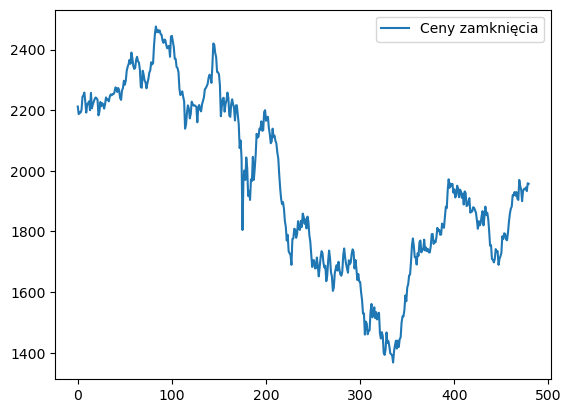

In [11]:
trainSet.plot(label = "Ceny zamknięcia")
plt.legend()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
result = adfuller(trainSet)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.4838714265793025
p-value: 0.5414742924920093


### Data transform

In [14]:
trainSet_diff = trainSet.diff().dropna()

result = adfuller(trainSet_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.606373574507654
p-value: 1.6923639547361233e-23


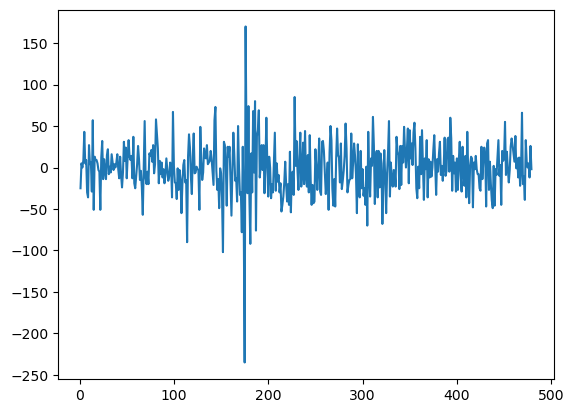

In [15]:
trainSet_diff.plot()
plt.show()

### Auto correlation and partial auto correlation

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
import warnings
warnings.filterwarnings('ignore')

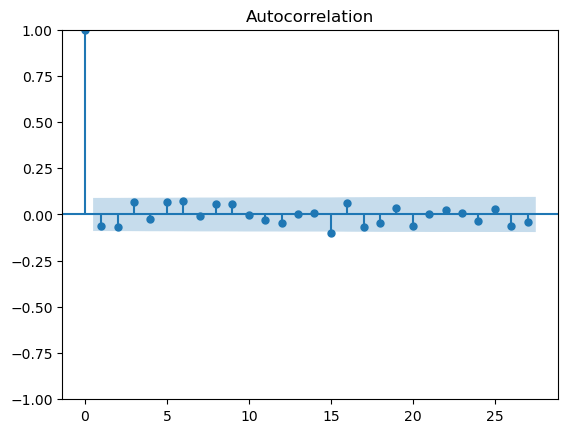

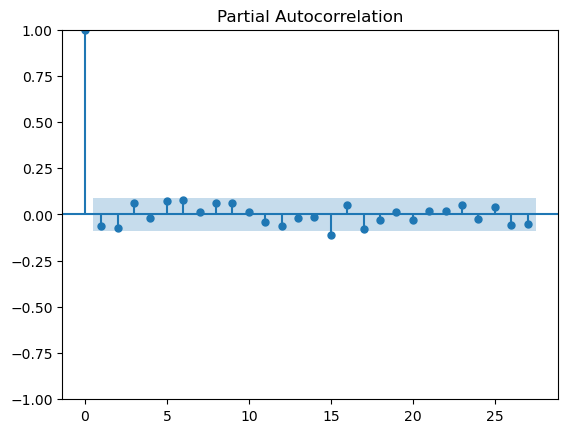

In [18]:
plot_acf(trainSet_diff)
plt.show()

plot_pacf(trainSet_diff)
plt.show()

In [19]:
p = 15
d = 1
q = 15

### Prediction

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
model = ARIMA(trainSet, order=(p, d, q))
model_fit = model.fit()

In [22]:
predictions = model_fit.predict(train,len(Set)-1)

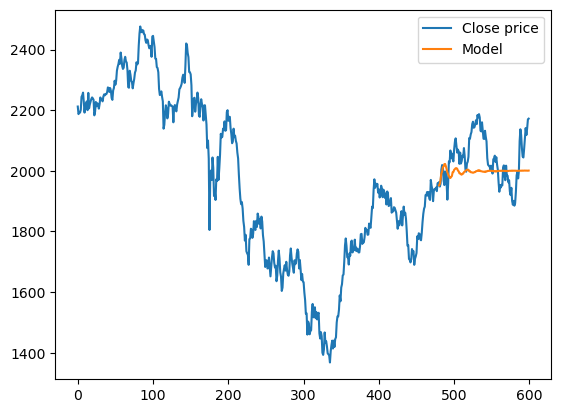

In [23]:
Set.plot(label='Close price')
predictions.plot(label='Model')
plt.legend();

### Results

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
actual_values = testSet

In [26]:
mean_squared_error(actual_values,predictions,squared=False)

87.01626310470735